In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K 

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28,28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

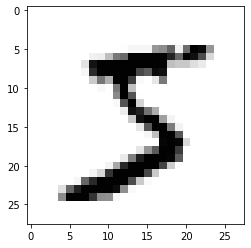

In [13]:
first_image = x_train[0,:,:]
plt.imshow(first_image, cmap = plt.cm.Greys)
plt.show()

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape: ',x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
model = Sequential()
model.add(Conv2D(32,3,3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

class AccuracyHistory(keras.callbacks.Callback):
    def on_train_bdgin(self, logs={}):
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('accuracy'))
        
history = AccuracyHistory()
model.fit(x_train, y_train,
         batch_size = batch_size, epochs=epochs, verbose=1,
         validation_data = (x_test,y_test),
         callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_3/convolution}}]]
	 [[Mean_2/_125]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_3/convolution}}]]
0 successful operations.
0 derived errors ignored.